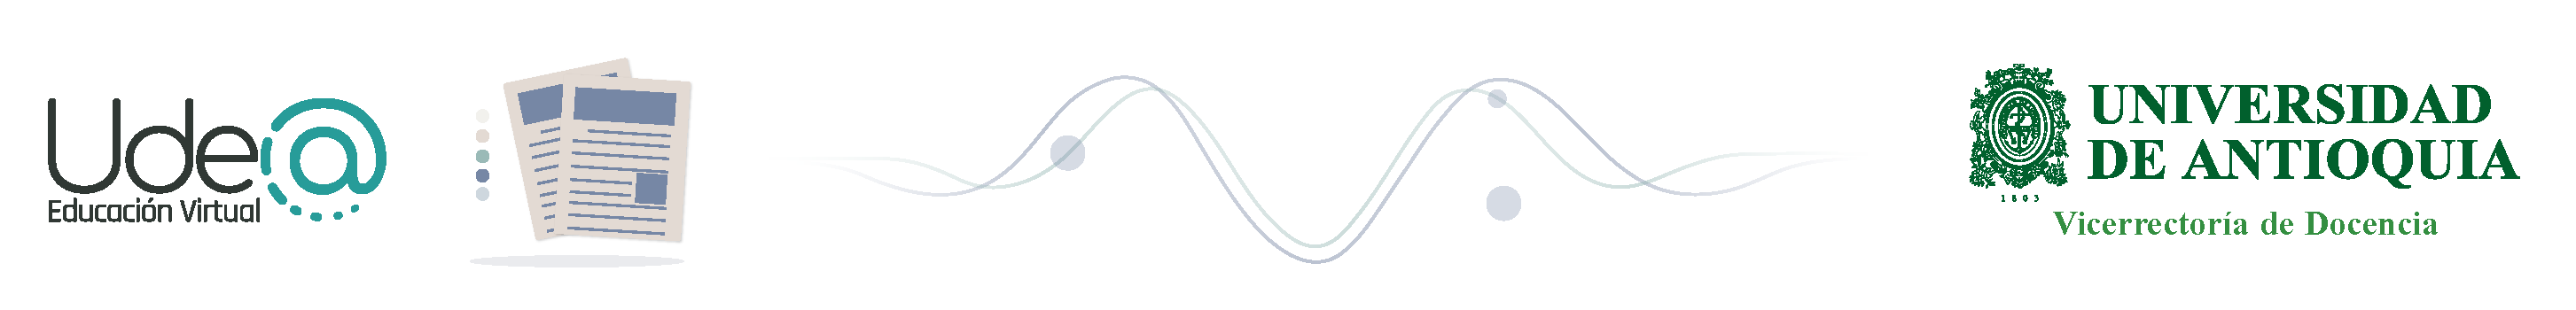

# Affective Computing Analysis


**Tratamiento de Señales III**

*Prof. Hernán Felipe García Arias*

*Facultad de Ingeniería*

*Universidad de Antioquia*

*2022-1*

*Santiago Taborda Echeverri, Shirley Tatiana Galvis Gomez*

>This project aims to characterize physiological patterns on multivariate signals such as EEG, ECG, EOG, and EMG to capture relevant patterns that define an emotional process.









## Cargar bases de datos de computación afectiva


La base de datos [DEAP](http://www.eecs.qmul.ac.uk/mmv/datasets/deap/index.html) es un conjunto de datos multimodal para el análisis de los estados afectivos humanos. El electroencefalograma (EEG) y las señales fisiológicas periféricas de 32 participantes se registraron mientras cada uno miraba 40 extractos de videos musicales de un minuto de duración. Los participantes calificaron cada video en términos de niveles de excitación (arousal), valencia, me gusta / no me gusta, dominio y familiaridad. Para 22 de los 32 participantes, también se grabó un video de cara frontal. Se utilizó un método novedoso para la selección de estímulos, utilizando la recuperación por etiquetas afectivas del sitio web last.fm, detección de videos destacados y una herramienta de evaluación en línea.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

ruta = '/content/drive/MyDrive/2022-1/Señales III/MiniProyecto1_CursoSeñalesIII/ComputacionAfectiva_MiniProyecto1/data/'
fileName = 'affetiveDB_1.mat'
db = sio.loadmat(ruta+fileName)
db

{'__globals__': [],
 '__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Wed Aug 21 08:32:33 2013',
 '__version__': '1.0',
 'data': array([[[ 8.28494516e+00, -4.70161096e+00, -1.02672095e+01, ...,
          -9.77824286e+00, -3.02833644e+00,  9.30602221e+00],
         [-6.53134353e+00, -6.39228885e+00, -5.35397659e+00, ...,
          -9.64971643e+00,  3.38012568e+00,  3.81578354e+00],
         [-4.31897037e+00, -7.25473610e+00, -6.09319182e+00, ...,
           1.08196674e+00,  5.08426157e-02, -7.81959030e+00],
         ...,
         [-1.91385364e+03, -1.95304107e+03, -1.99285350e+03, ...,
          -5.04522286e+03, -5.08694153e+03, -5.09962900e+03],
         [-3.90420066e+03, -3.95498114e+03, -3.99746096e+03, ...,
           6.22601646e+03,  6.14984575e+03,  6.07367503e+03],
         [ 8.17697854e-04,  8.17697854e-04,  8.17697854e-04, ...,
           1.98174544e-02,  1.98174544e-02,  2.08174416e-02]],
 
        [[ 1.43362822e+01,  2.82370646e+01,  6.88048163e+00, ...,
  

In [ ]:
X = db['data']
X.shape

(40, 40, 6528)

### Dataset description

La base de datos se le removieron los 3 segundos iniciales de acondicionamiento. El arreglo X contiene todas las respuestas emocionales de las señales biológicas, para 40 videos diferentes. El arreglo se organiza de la forma

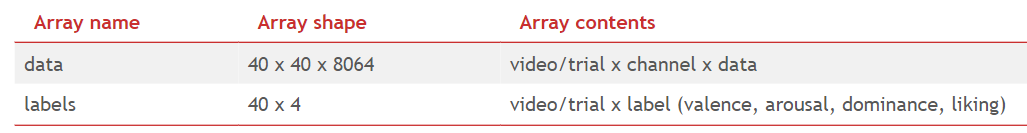

La siguiente tabla muestra el diseño de canales y el preprocesamiento realizado:

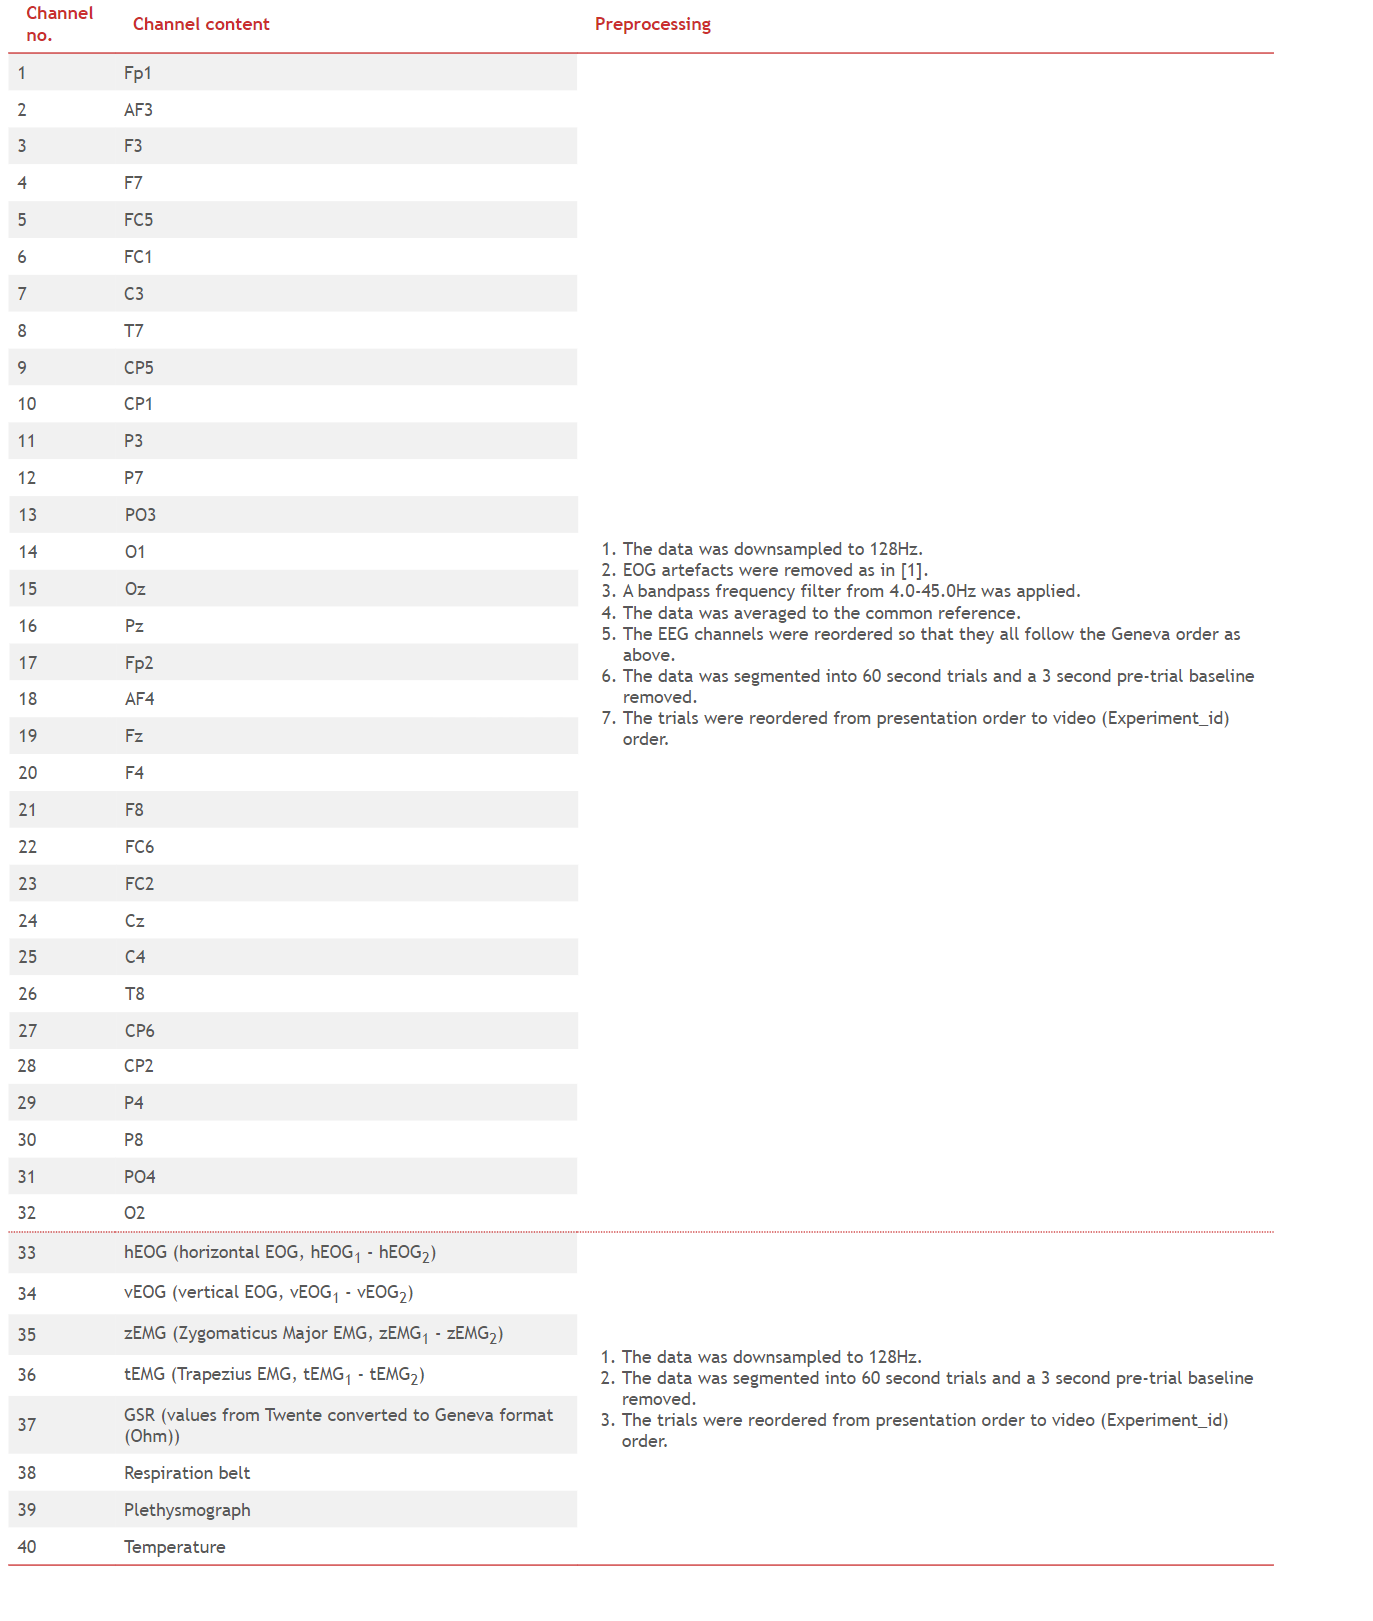

## Siglas señales fisiológicas

EEG: señales electroencefalográficas 
Generalmente son 32 canales 

EOG: electrooculograma (2 señales) movimientos verticales y horizontales

EMG: electromiogramas (2 señales) para los movimientos de los músculos (en la base de datos se capturó la señal del rostro).

Respiration belt:  banda que mide la frecuencia respiratoria

Temperatura: Mide la temperatura de la piel

Plethimograph:  Un pletismógrafo es un instrumento para medir cambios de volumen dentro de un órgano o de todo el cuerpo (generalmente como resultado de fluctuaciones en la cantidad de sangre o aire que contiene). Nos sirve como medida de el rítmo cardiaco (HR)

## Gráfica de una señal emocional

Por ejemplo si queremos obtener la señal de **respiration belt (respiración)** de la base de datos para el video número 15 (i.e., por elegir alguno), debe acceder a los datos mediante:

In [ ]:
N = 40 # observations per subject
nSignals = 40
Npoints = 6528
T = 1./128
print('Time duration (s):', Npoints*T )

Time duration (s): 51.0


(6528,)


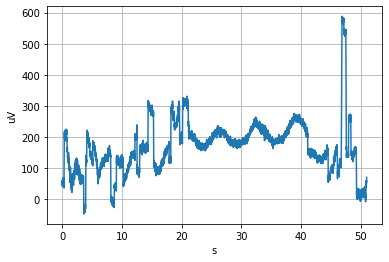

In [ ]:
trial = 15 # video una observación 
channel = 33 # canal de la señal fisiológica
respiration = X[trial-1,channel-1,:]
print(respiration.shape)
ts = len(respiration)/128.
time = np.linspace(0,ts,len(respiration))

plt.plot(time,respiration)
plt.ylabel('uV')
plt.xlabel('s')
plt.grid()
plt.show()

## Etiquetas emocionales

Cada una de las realizaciones induce una emoción en los sujetos. Por lo tanto cada realización (de las 40) tiene sus correspondientes etiquetas de la forma:

Los modelos dimensionales sugieren que la emoción se entiende mejor cuando ocurre dentro de un espacio dimensional, más comúnmente un espacio bidimensional que abarca la valencia y la excitación. La valencia emocional describe el grado en que una emoción es positiva o negativa, mientras que la excitación se refiere a su intensidad, es decir, la fuerza del estado emocional asociado.


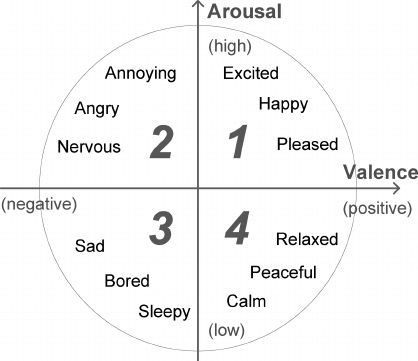

Las etiquetas están en el campo label:

labels	es una matriz de $40 \times 4$ en la cual se organiza de la forma	$video/trial \times label $ (valence, arousal, dominance, liking)

Valence	The valence rating (float between 1 and 9).
Arousal	The arousal rating (float between 1 and 9).
Dominance	The dominance rating (float between 1 and 9).
Liking	The liking rating (float between 1 and 9).


In [ ]:
labels = db['labels']
print(labels)

[[2.51 5.65 2.9  1.97]
 [6.45 5.03 5.04 5.54]
 [6.74 5.83 6.37 6.83]
 [7.09 5.67 2.53 5.65]
 [5.51 7.9  9.   8.14]
 [4.99 3.63 5.05 2.78]
 [6.83 2.87 6.17 7.14]
 [3.51 2.88 7.14 1.5 ]
 [4.18 4.24 4.55 2.96]
 [5.14 7.5  9.   7.01]
 [7.27 4.27 5.04 3.15]
 [5.97 3.9  4.1  6.01]
 [3.88 2.14 1.42 2.54]
 [3.64 6.28 2.83 6.96]
 [2.67 5.53 1.   6.05]
 [4.97 1.   5.05 2.76]
 [1.21 8.47 1.19 9.  ]
 [6.56 5.72 5.22 7.37]
 [2.86 2.94 3.9  2.4 ]
 [3.82 5.87 7.63 1.87]
 [4.42 2.   6.22 2.62]
 [6.79 1.   5.03 4.36]
 [3.9  3.83 2.77 3.54]
 [2.51 5.38 1.53 5.99]
 [2.47 3.45 2.4  2.13]
 [1.82 6.21 3.36 7.56]
 [2.59 5.49 2.88 1.83]
 [2.85 3.38 3.44 6.69]
 [3.23 2.79 3.09 2.62]
 [6.1  3.68 3.88 6.05]
 [3.88 5.79 5.04 6.19]
 [5.01 8.12 4.96 2.86]
 [1.   3.92 4.96 1.  ]
 [1.   7.53 1.   1.  ]
 [1.   3.71 4.22 1.82]
 [5.05 3.83 6.17 5.88]
 [6.09 5.5  6.44 5.83]
 [4.27 6.26 7.94 6.53]
 [6.13 5.97 8.49 6.  ]
 [3.74 3.77 4.05 6.19]]


## Generemos una gráfica del espacio emocional Arousal-Valence

Valencia Baja - Media y Alta

[1-3,4-6,7-9]

Arousal Baja - Media y Alta

[1-3,4-6,7-9]

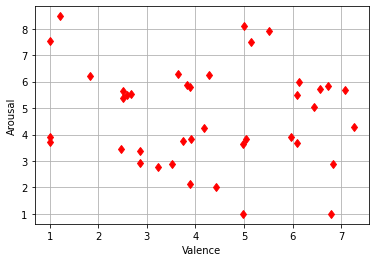

In [ ]:
Valence = labels[:,0]
Arousal = labels[:,1]

plt.plot(Valence,Arousal,'dr')
plt.grid()
plt.xlabel('Valence')
plt.ylabel('Arousal')
plt.show()

## EEG analysis

El análisis en el dominio de la frecuencia se realiza utilizando el algoritmo de Transformada Rápida de Fourier (FFT) (con una resolución de 0,125 Hz) para calcular la densidad de potencia absoluta (μV2 / Hz), la densidad de potencia relativa (%) y la frecuencia media (Hz) dentro de cada una de las subbandas. La potencia absoluta de una banda es la integral de todos los valores de potencia dentro de su rango de frecuencia. Los índices de potencia relativa (RP) para cada banda se encuentran expresando la potencia absoluta en cada banda de frecuencia como un porcentaje de la potencia absoluta (AP) sumada en las cuatro bandas de frecuencia. Para las medidas de asimetría de potencia inter-hemisférica (absoluta) para cada banda para siete sitios homólogos (AF3-AF4, F7-F8, F3-F4, FC5-FC6, T7-T8, P7-P8, O1-O2) y un conjunto adicional de diez pares de sitios de electrodos (AF3-F3, AF4-F4, F3-O1, F4-O2, FC5-P7, FC6-P8, P7-O1, P8-O2, T7-O1, T8-O2). Los índices de asimetría del hemisferio derecho (R) frente al hemisferio izquierdo (L) (R-L) se calcularon con la fórmula [(R-L) / (R + L)]. Para la simetría intra-hemisférica, las relaciones de valor anterior (A) (frontal) vs. posterior (P) (posterior) (A-P) para cada par de electrodos se derivaron con la fórmula [(A-P) / (A + P)]. Las variables de EEG de potencia absoluta y asimetría se pueden transformar logarítmicamente (log (χ)) y las variables de potencia relativa se pueden transformar mediante log [χ ÷ (1 - χ)] con el fin de normalizar la distribución de los datos [63-65].

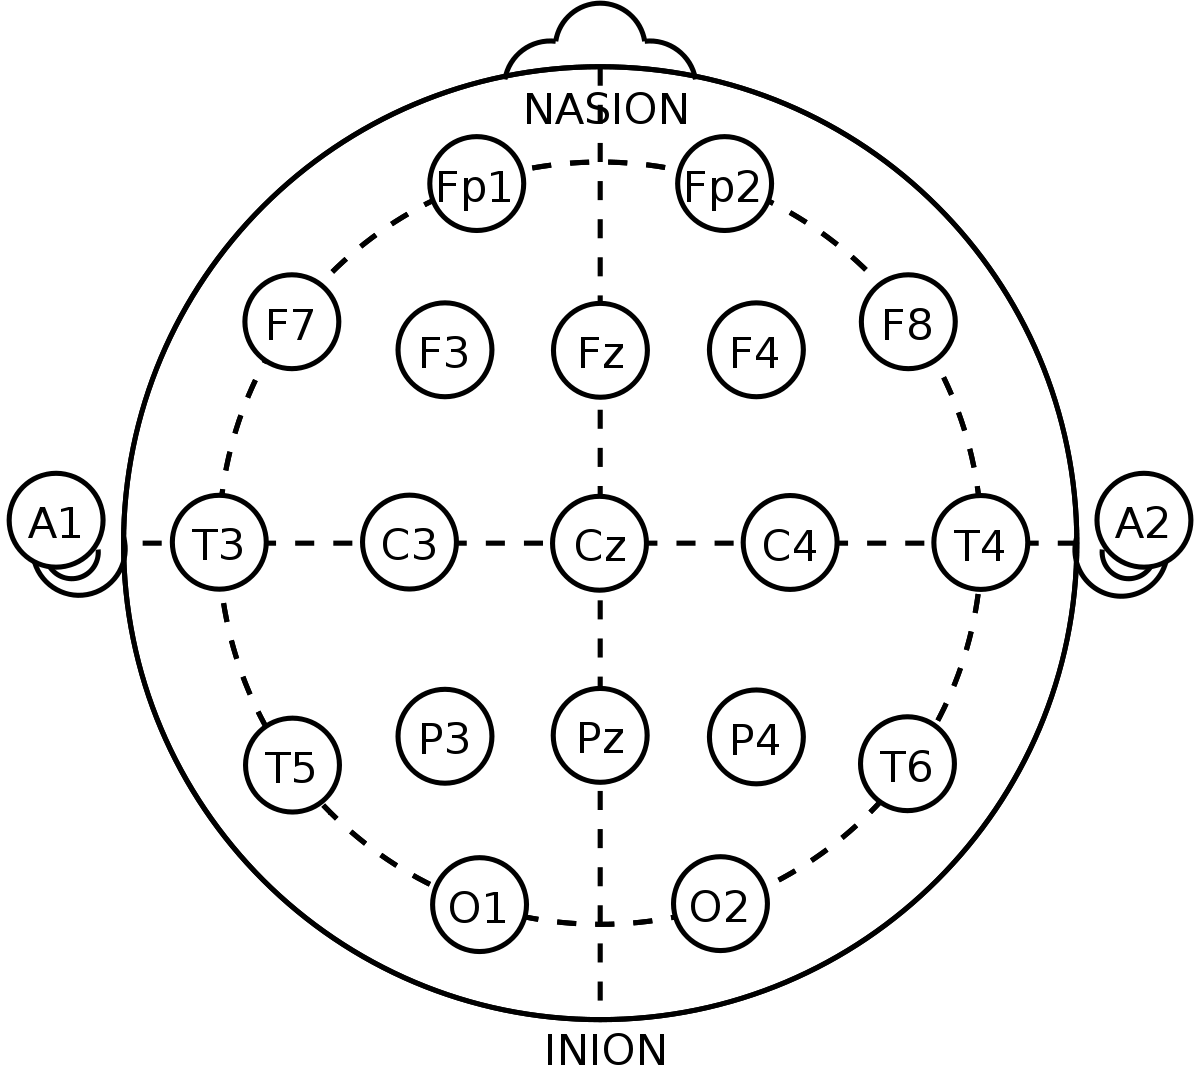

(6528,)


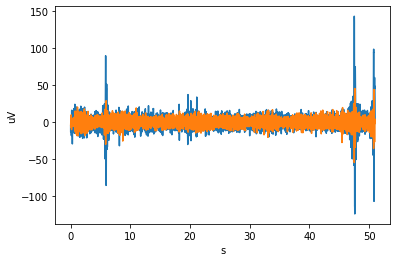

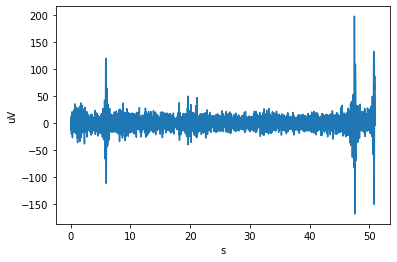

In [ ]:
trial = 15 # video u observación 
channel = 3 # canal de la señal EEG F3
F3 = X[trial-1,channel-1,:]

channel = 20 # canal de la señal EEG F4
F4 = X[trial-1,channel-1,:]

print(respiration.shape)
ts = len(respiration)/128.
time = np.linspace(0,ts,len(respiration))

plt.plot(time,F3)
plt.plot(time,F4)
plt.ylabel('uV')
plt.xlabel('s')
plt.show()

# se resta por convención el hemisferio izq del der
assF3F4 = F3-F4
plt.figure()
plt.plot(time,assF3F4)
plt.ylabel('uV')
plt.xlabel('s')
plt.show()


## Densidad espectral de potencia


In [ ]:
from scipy import signal
import matplotlib.pyplot as plt
import scipy.signal as sp
import seaborn as sns

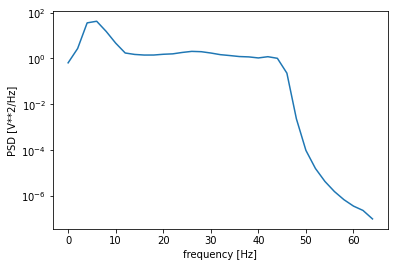

In [ ]:
fs = 128 # fs
f, Pxx_F3F4 = signal.welch(assF3F4, fs, nperseg=64)
plt.semilogy(f, Pxx_F3F4)
#plt.ylim([0.5e-3, 1])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()

## Potencia Absoluta

$potAbso = \sum_{n=1}^N{potF3F4_{n}}$

In [ ]:
potAbsoF3F4 = np.sum(Pxx_F3F4)

print(potAbsoF3F4,20*np.log(potAbsoF3F4))

126.40689015820199 96.79011981944738


## Alternativa FFT

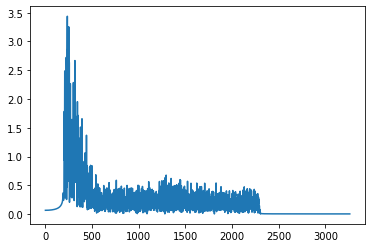

In [ ]:
from scipy.fft import fft
yf = fft(assF3F4)

aux = 2.0/len(assF3F4) * np.abs(yf[1:len(assF3F4)//2])
plt.plot(aux)
plt.show()

## EEG sub bands

The most commonly studied waveforms include delta (0.5 to 4Hz); theta (4 to 7Hz); alpha (8 to 12Hz); sigma (12 to 16Hz), beta (13 to 30Hz), and gamma (greater than30 Hz)

In [ ]:
# Pasos para Spectral features in subbands
# 1. Filtrar las señales 1-32 entre la sub-banda deseada
# 2a. Si se desea para cada electrodo, calcular la PSD
# 2b. Sino, restar la asimetría (hemiIzq-hemiDer) y calcular la PSD

## Visualización de las etiquetas emocionales

Decidimos tomar las emociones de la siguiente manera, asignando a cada cuadrante mostrado en la imagen de modelo dimensional para Arousal-Valence un rango:

- **Happy :** Arousal $[4.5,9]$ y Valencia $[4.5,9]$

- **Angry :** Arousal $[4.5,9]$ y Valencia $[0,4.5]$

- **Bored :** Arousal $[0,4.5]$ y Valencia $[0,4.5]$

- **Peaceful :** Arousal $[0,4.5]$ y Valencia $[4.5,9]$

In [ ]:
happy = 'happy' # Etiqueta númerica 1
angry = 'angry' # Etiqueta númerica 2
bored = 'bored' # Etiqueta númerica 3
peaceful = 'peaceful' # Etiqueta númerica 4

Valence = labels[:,0]
Arousal = labels[:,1]

In [ ]:
happy_Arousal = np.logical_and(Arousal>4.5,Arousal<9) # Arousal $[4.5,9]$
happy_Valence = np.logical_and(Valence>4.5,Valence<9) # Valencia $[4.5,9]$
happy_IndexLabels = np.where(np.logical_and(happy_Arousal,happy_Valence))

angry_Arousal = np.logical_and(Arousal>4.5,Arousal<9) # Arousal $[4.5,9]$
angry_Valence = np.logical_and(Valence>0,Valence<4.5) # Valencia $[0,4.5]$
angry_IndexLabels = np.where(np.logical_and(angry_Arousal,angry_Valence))

bored_Arousal = np.logical_and(Arousal>0,Arousal<4.5) # Arousal $[0,4.5]$
bored_Valence = np.logical_and(Valence>0,Valence<4.5) # Valencia $[0,4.5]$
bored_IndexLabels = np.where(np.logical_and(bored_Arousal,bored_Valence))

peaceful_Arousal = np.logical_and(Arousal>0,Arousal<4.5) # Arousal $[0,4.5]$
peaceful_Valence = np.logical_and(Valence>4.5,Valence<9) # Valencia $[4.5,9]$
peaceful_IndexLabels = np.where(np.logical_and(peaceful_Arousal,peaceful_Valence))

labels = np.zeros((labels.shape[0]))

labels[happy_IndexLabels] = 1
labels[angry_IndexLabels] = 2
labels[bored_IndexLabels] = 3
labels[peaceful_IndexLabels] = 4

# **Función de creación y uso de un filtro pasa banda**

Debido a que las características descritas desde el paper raíz hacen referencia a unas bandas de frecuencia especifícas, es necesario contar con una función para la aplicación de un filtro digital; cabe aclarar que, dicho filtro se plantea de alto orden con el objetivo de tener una mejor respuesta en frecuencia del mismo.

El filtro diseñado es tipo Chebyshev tipo I, esto dado que al hacer un analisis entre tres tipos de filtros (Butterworth, Bessel, Chebyshev tipo I) se encontró que para bajas frecuencias este contaba con una mejor respuesta.

In [ ]:
def chebyFilterBandpass(f_s, f_c, f_c2, n_order, signal_2filter, graph=False):
  """
  Funcion para crear un filtro analógico según el orden del mismo
  Entradas:
      - Frecuencia de muestreo de la señal a filtrar
      - Frecuencia de corte 1 del filtro a diseñar
      - Frecuencia de corte 2 del filtro a diseñar
      - int correspondiente al orden del filtro deseado
      - arreglo representativo de la señal a filtrar
  Salidas:
      - arreglo Corresponde a la señal filtrada
  """
  # Normalización de frecuencias
  wc_norm = 2*(f_c/f_s)         # Frecuencia de corte 1 normalizada
  wc2_norm = 2*(f_c2/f_s)       # Frecuencia de corte 2 normalizada

  sos = sp.cheby1(n_order, 0.001, [wc_norm, wc2_norm], 'bandpass', analog=False, output='sos')
  # Se determina la respuesta en frecuencia del filtro
  w, h = signal.sosfreqz(sos, worN=1500) 

  # Se aplica el filtro diseñado a la señal a filtrar
  filtered = sp.sosfilt(sos, signal_2filter)
  
  if graph:
    # Se genera la gráfica de la resupuesta del filtro
    plt.figure(figsize=(18,6))
    plt.plot((w*f_s)/(2*np.pi), np.abs(h))
    plt.vlines([f_c,f_c2],0,1,color='g',lw=2.,linestyle='--')
    plt.xlabel('frecuencia [Hz]', fontsize=18) 
    plt.ylabel('Amplitud', fontsize=18)
    plt.xlim([f_c-0.1,f_c2+0.1])
    plt.grid()
    plt.show()

    #Generación de las graficas para comparar las señales
    ts = len(signal_2filter)/f_s
    time = np.linspace(0,ts,len(signal_2filter))

    plt.subplot(121)
    plt.plot(time, signal_2filter)
    plt.title('Señal sin filtrar', fontsize=18)
    plt.xlabel('Tiempo [s]', fontsize=15)
    plt.ylabel('Amplitud', fontsize=15)
    plt.grid()

    plt.subplot(122)
    plt.plot(time, filtered)
    plt.title('Señal filtrada', fontsize=18)
    plt.xlabel('Tiempo [s]', fontsize=15)
    plt.ylabel('Amplitud', fontsize=15)
    plt.grid()

    # Ajuste de las dimensiones de las gráficas
    plt.subplots_adjust(top=1, bottom=0.08, left=0.05, right=2, hspace=0.15 ,wspace=0.35)

    plt.show()

  return filtered

# **Características GSR**

- Average skin resistance: Se calcula determinando el promedio de cada una de las observaciones, utilizando Broadcasting de numpy.

- Average of derivative: Se calcula la derivada numérica (usando np.diff) y a dicho cálculo se le determina el promedio, en ambos casos se hace uso del Broadcasting de numpy.

- Average of derivative for negative values only (average decrease
rate during decay time): Al igual que la característica anterior se efectua el cálculo de la derivada pero para determinar el promedio solo se toma en cuenta aquellos valores negativos, de nuevo utilizando Broadcasting de numpy.

In [ ]:
def featuresGSR(dataX):
  """
  Funcion para calcular las características GSR seleccionadas
  Entradas:
      - Conjunto de datos
  Salidas:
      - Arreglos correspondientes a las características
  """
  GSR = dataX[:,37-1,:]
  averageSkinResistance = []
  averageDerivate = []
  averageDerivateNegative = []

  for i in range(GSR.shape[0]):

    averageSkinResistance.append(np.nanmean(GSR[i,:]))

    averageDerivate.append(np.nanmean(np.diff(GSR[i,:])))

    derivate = np.diff(GSR[i,:])
    averageDerivateNegative.append(np.nanmean(derivate[np.where(derivate<0)]))

  averageSkinResistance = np.array(averageSkinResistance)
  averageDerivate = np.array(averageDerivate)
  averageDerivateNegative = np.array(averageDerivateNegative)

  return averageSkinResistance, averageDerivate, averageDerivateNegative

# **Características Blood volume pressure**

- Energy ratio between the frequency bands $[0.04-0.15]Hz$ and $[0.15-0.5]Hz$: Se aplica el filtro sobre la señal en las bandas especificadas, de forma independiente se calcula la energía para cada banda filtrada haciendo uso de la expresión $∑_{-∞}^{∞}|x[n]|^2$, posteriormente se calcula la razón entre ambas bandas.

- Spectral power in the bands $[0.1-0.2]Hz$: Inicialmente se aplica el filtro en la banda especificada, en este caso al tomar justo el rango, la respuesta del filtro presentaba una banda de transición bastante amplia y una banda pasante estrecha, por ello se amplia la banda a $[0.08-0.22]Hz$; posteriormente se calcula la potencia máxima de la señal filtrada haciendo uso de Welch.

- Spectral power in the bands high  frequency $[0.15-0.5]Hz$: Al igual que el caso anterior se filtra la señal y se calcula su potencia máxima, cabe aclarar que el rango de frecuencia para el filtro se conserva en $[0.15-0.5]Hz$.

In [ ]:
def featuresBVP(dataX, f_s):
  """
  Funcion para calcular las características Blood Volume Pressure seleccionadas
  Entradas:
      - Conjunto de datos
      - Frecuencia de muestreo de las señales
  Salidas:
      - Arreglos correspondientes a las características
  """
  BVP = dataX[:,39-1,:]
  energyRatio = []

  spectralPowerBand1 = []

  spectralPowerBandHigh = []

  for i in range(BVP.shape[0]):
    #energy ratio bands [0.04-0.15]Hz and [0.15-0.5]Hz,
    signalBVP_FilteredEnergy1 = chebyFilterBandpass(f_s, 0.04, 0.15, 20, BVP[i,:], graph=False)
    signalBVP_FilteredEnergy2 = chebyFilterBandpass(f_s, 0.15, 0.5, 20, BVP[i,:], graph=False)
    energyRatio.append(np.sum(np.abs(signalBVP_FilteredEnergy1)**2)/ np.sum(np.abs(signalBVP_FilteredEnergy2)**2))

    #spectral Power Band [0.1-0.2]Hz, el filtro se fija con frecuencias [0.08-0.22]
    #con el fin de filtrar mejor la señal entre la banda de interes
    signalBVP_Filtered1 = chebyFilterBandpass(f_s, 0.08, 0.22, 20, BVP[i,:], graph=False)
    f1, Pxx_den1 = sp.welch(signalBVP_Filtered1, f_s, nperseg=1024)
    spectralPowerBand1.append(np.max(Pxx_den1))

    #spectral Power Band [0.15-0.5]Hz
    signalBVP_FilteredHigh = chebyFilterBandpass(f_s, 0.15, 0.5, 20, BVP[i,:], graph=False)
    fHigh, Pxx_denHigh = sp.welch(signalBVP_FilteredHigh, f_s, nperseg=1024)
    spectralPowerBandHigh.append(np.max(Pxx_denHigh))

  energyRatio = np.array(energyRatio)
  spectralPowerBand1 = np.array(spectralPowerBand1)
  spectralPowerBandHigh = np.array(spectralPowerBandHigh)

  return energyRatio, spectralPowerBand1, spectralPowerBandHigh

# **Características Respiration pattern**

- Band energy ratio: Hace referencia a la diferencia entre el logaritmo de la energia de las bandas filtradas correspondiente a $[0.05-0.25]Hz$ y $[0.25-5]Hz$, se aplican los filtros en los rangos requeridos, la energía se calcula siguiendo la expresión $∑_{-∞}^{∞}|x[n]|^2$ y utilizando numpy su respectivo logaritmo para efectuar la diferencia.

- Average respiration signal: Se calcula determinando el promedio de cada una de las observaciones, utilizando Broadcasting de numpy.

- Mean of derivative (variation of the respiration signal): Se calcula la derivada numérica (usando np.diff) y a dicho cálculo se le determina el promedio, en ambos casos se hace uso del Broadcasting de numpy.

In [ ]:
def featuresRP(dataX, f_s):
  """
  Funcion para calcular las características Respiration Pattern seleccionadas
  Entradas:
      - Conjunto de datos
      - Frecuencia de muestreo de las señales
  Salidas:
      - Arreglos correspondientes a las características
  """
  RP = dataX[:,38-1,:]

  energyRatio = []
  averageRespirationSignal = []
  averageDerivate = []

  for i in range(RP.shape[0]):
    #energy ratio bands [0.05-0.25]Hz and [0.25-5]Hz (difference between the logarithm)
    signalRP_FilteredEnergy1 = chebyFilterBandpass(f_s, 0.05, 0.25, 20, RP[i,:], graph=False)
    signalRP_FilteredEnergy2 = chebyFilterBandpass(f_s, 0.25, 0.5, 20, RP[i,:], graph=False)
    energyRatio.append(np.log(np.sum(np.abs(signalRP_FilteredEnergy1)**2)) - np.log(np.sum(np.abs(signalRP_FilteredEnergy2)**2)))

    averageRespirationSignal.append(np.nanmean(RP[i,:]))

    averageDerivate.append(np.nanmean(np.diff(RP[i,:])))

  energyRatio = np.array(energyRatio)
  averageRespirationSignal = np.array(averageRespirationSignal)
  averageDerivate = np.array(averageDerivate)

  return energyRatio, averageRespirationSignal, averageDerivate

# **Características Skin temperature**

- Average: Se calcula determinando el promedio de cada una de las observaciones, utilizando Broadcasting de numpy. 

- Average of its derivative: Se calcula la derivada numérica (usando np.diff) y a dicho cálculo se le determina el promedio, en ambos casos se hace uso del Broadcasting de numpy.

- Spectral power in the bands $[0.1-0.2]Hz$: Inicialmente se aplica el filtro en la banda especificada, posteriormente se calcula la potencia máxima de la señal filtrada haciendo uso de Welch.


In [ ]:
def featuresST(dataX, f_s):
  """
  Funcion para calcular las características Skin Temperature seleccionadas
  Entradas:
      - Conjunto de datos
      - Frecuencia de muestreo de las señales
  Salidas:
      - Arreglos correspondientes a las características
  """
  ST = dataX[:,40-1,:]

  averageSkinTemperature = []
  averageDerivate = []
  spectralPower = []

  for i in range(ST.shape[0]):
    averageSkinTemperature.append(np.nanmean(ST[i,:]))

    averageDerivate.append(np.nanmean(np.diff(ST[i,:])))

    #spectral Power Band [0.1-0.2]Hz
    signalST_Filtered = chebyFilterBandpass(f_s, 0.1, 0.2, 20, ST[i,:], graph=False)
    f, Pxx_den = sp.welch(signalST_Filtered, f_s, nperseg=1024)
    spectralPower.append(np.max(Pxx_den))
  
  averageSkinTemperature = np.array(averageSkinTemperature)
  averageDerivate = np.array(averageDerivate)
  spectralPower = np.array(spectralPower)

  return averageSkinTemperature, averageDerivate, spectralPower

# **Características EMG and EOG**

Se hace la aclaración de que las señales EMG y EOG tomadas en el experimento se presentan en pares (*Horizontal EOG - Vertical EOG* y *Zygomaticus Major EMG - Trapezius EMG*).

- Energy of the signal: Se elige Vertical EOG para realizar el cálculo de la energía siguiendo la expresión $∑_{-∞}^{∞}|x[n]|^2$ y utilizando numpy su respectivo logaritmo para efectuar la diferencia.

- Mean: Se elije Zygomaticus Major EMG para determinar el promedio de cada una de las observaciones, utilizando Broadcasting de numpy.

- Variance of the signal: Se elije Trapezius EMG para determinar la varianza de cada una de las observaciones, utilizando Broadcasting de numpy.

In [ ]:
def featuresEOGandEMG(dataX, f_s):
  """
  Funcion para calcular las características EMG EOG seleccionadas
  Entradas:
      - Conjunto de datos
      - Frecuencia de muestreo de las señales
  Salidas:
      - Arreglos correspondientes a las características
  """
  hEOG = dataX[:,33-1,:]
  vEOG = dataX[:,34-1,:]
  zEMG = dataX[:,35-1,:]
  tEMG = dataX[:,36-1,:]
  	
  energyvEOG = []   
  averagezEMG = []
  variancetEMG = []   

  for i in range(vEOG.shape[0]):
    energyvEOG.append(np.sum(np.abs(vEOG[i,:])**2))

    averagezEMG.append(np.nanmean(zEMG[i,:]))

    variancetEMG.append(np.var(tEMG[i,:]))
  
  energyvEOG = np.array(energyvEOG)   
  averagezEMG = np.array(averagezEMG)
  variancetEMG = np.array(variancetEMG)

  return energyvEOG, averagezEMG, variancetEMG

# **Características EEG**

EEG cuenta con 32 señales independientes que correspenden a electrodos, en nuestro caso se selecciona T7 y T8 para realizar los cálculos.

- Spectral power T7 Beta band $[14-30]Hz$: Inicialmente se aplica el filtro en la banda especificada, posteriormente se calcula la potencia máxima de la señal filtrada haciendo uso de Welch.

- Spectral power T8 Beta band $[14-30]Hz$: Inicialmente se aplica el filtro en la banda especificada, posteriormente se calcula la potencia máxima de la señal filtrada haciendo uso de Welch.

- The spectral power asymmetry Beta band $[14-30]Hz$: La asimetría para el par de electrodos T7 y T8 se define como $T7-T8$, se aplica el filtro en la banda especificada, posteriormente se calcula la potencia máxima de la señal filtrada haciendo uso de Welch.

In [ ]:
def featuresEEG(dataX, f_s):
  """
  Funcion para calcular las características EEG seleccionadas
  Entradas:
      - Conjunto de datos
      - Frecuencia de muestreo de las señales
  Salidas:
      - Arreglos correspondientes a las características
  """
  #T7-T8
  EEGT7 =dataX[:,8-1,:]
  EEGT8 =dataX[:,26-1,:]

  # Asimetría se resta por convención el hemisferio izq del der (T7-T8)
  asymmetry = EEGT7-EEGT8

  spectralPowerEEGT7 = []
  spectralPowerEEGT8 = []
  spectralPowerAsymmetry = []

  for i in range(EEGT7.shape[0]):
    #spectral Power EEGT7 Band beta [14-30]Hz
    signalEEGT7_Filtered = chebyFilterBandpass(f_s, 14, 30, 20, EEGT7[i,:], graph=False)
    f, Pxx_den = sp.welch(signalEEGT7_Filtered, f_s, nperseg=1024)
    spectralPowerEEGT7.append(np.max(Pxx_den))

    #spectral Power EEGT8 Band beta [14-30]Hz
    signalEEGT8_Filtered = chebyFilterBandpass(f_s, 14, 30, 20, EEGT8[i,:], graph=False)
    f, Pxx_den = sp.welch(signalEEGT8_Filtered, f_s, nperseg=1024)
    spectralPowerEEGT8.append(np.max(Pxx_den))

    #spectral Power asymmetry Band beta [14-30]Hz
    signalAsymmetry_Filtered = chebyFilterBandpass(f_s, 14, 30, 20, asymmetry[i,:], graph=False)
    f, Pxx_den = sp.welch(signalAsymmetry_Filtered, f_s, nperseg=1024)
    spectralPowerAsymmetry.append(np.max(Pxx_den))
    
  spectralPowerEEGT7 = np.array(spectralPowerEEGT7)
  spectralPowerEEGT8 = np.array(spectralPowerEEGT8)
  spectralPowerAsymmetry = np.array(spectralPowerAsymmetry)

  return spectralPowerEEGT7, spectralPowerEEGT8, spectralPowerAsymmetry

# **Construcción de la matriz de características y su visualización**

Uso de las funciones de extracción y cálculo de características para la construcción de la matriz que se usa posteriormente en la creación de un DataFrame con el objetivo de su respectiva visualización con Seaborn.

In [ ]:
def featuresMatrix(dataX, f_s, labels_Matrix):

  featureMatrix = np.zeros((19,40))
  featureMatrix[0:3] = featuresGSR(dataX)
  featureMatrix[3:6] = featuresBVP(dataX, f_s)
  featureMatrix[6:9] = featuresRP(dataX, f_s)
  featureMatrix[9:12] = featuresST(dataX, f_s)
  featureMatrix[12:15] = featuresEOGandEMG(dataX, f_s)
  featureMatrix[15:18] = featuresEEG(dataX, f_s)
  featureMatrix[18] =  labels_Matrix

  return featureMatrix.T

In [ ]:
features = featuresMatrix(X, 128, labels)

titles = ['GSR_Average', 'GSR_AverageDerivate', 'GSR_AverageDerivateNeg',
           'BVP_EnergyRatio', 'BVP_SpectralPowerBand1', 'BVP_SpectralPowerBand2',
           'RP_EnergyRatio', 'RP_Average', 'RP_AverageDerivate',
           'ST_Average', 'ST_AverageDerivate', 'ST_SpectralPower',
           'vEOG_Energy', 'zEMG_Average', 'tEMG_Variance',
           'EEGT7_SpectralPower', 'EEGT8_SpectralPower', 'Asymmetry_SpectralPower',
           'Emotion']

dataFrame = pd.DataFrame(data = features, columns= titles)

In [ ]:
# sns.set_style('darkgrid')
# fig, ax = plt.subplots()

# unique = dataFrame["Emotion"].unique()
# palette = dict(zip(unique, sns.color_palette(n_colors=len(unique))))

# ax = sns.pairplot(data=dataFrame,  hue='Emotion', palette=palette, corner = True)
# plt.tight_layout()
# plt.figure()

# **Análisis de resultados**

De acuerdo a la gráfica obtenida por medio de Seaborn, se seleccionan los pares que a consideración personal permiten discriminar ciertos grupos de etiquetas

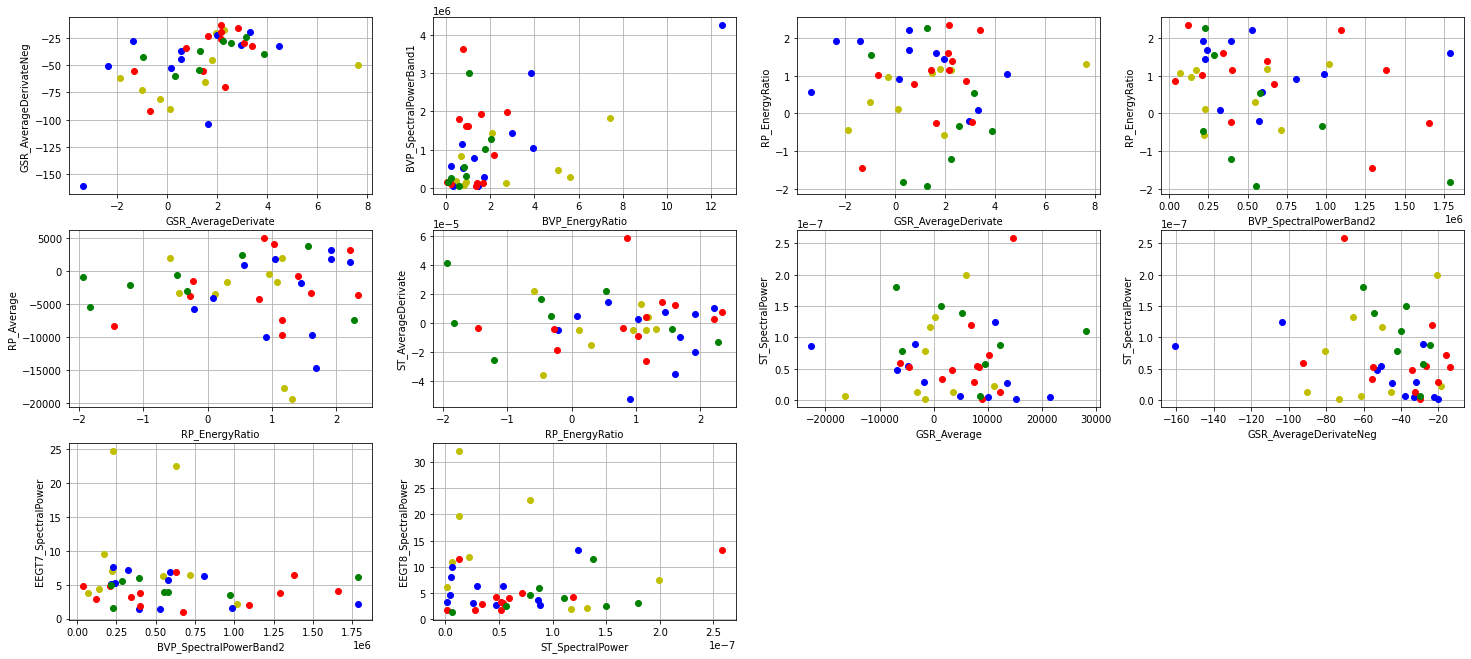

In [ ]:
filt0= dataFrame.loc[dataFrame['Emotion']==1]
filt1= dataFrame.loc[dataFrame['Emotion']==2]
filt2= dataFrame.loc[dataFrame['Emotion']==3]
filt3= dataFrame.loc[dataFrame['Emotion']==4]

#Características significativas 
y = ['GSR_AverageDerivateNeg','BVP_SpectralPowerBand1','RP_EnergyRatio',
     'RP_EnergyRatio','RP_Average','ST_AverageDerivate','ST_SpectralPower',
     'ST_SpectralPower','EEGT7_SpectralPower', 'EEGT8_SpectralPower']
#Características significativas 
x = ['GSR_AverageDerivate', 'BVP_EnergyRatio', 'GSR_AverageDerivate', 
     'BVP_SpectralPowerBand2', 'RP_EnergyRatio', 'RP_EnergyRatio', 'GSR_Average', 
     'GSR_AverageDerivateNeg', 'BVP_SpectralPowerBand2', 'ST_SpectralPower']

plt.figure(figsize=(25,15))
for i in range (len(y)):
  plt.subplot(4,4,i+1)
  plt.plot(filt0[x[i]],filt0[y[i]],'oy')
  plt.plot(filt1[x[i]],filt1[y[i]],'ob')
  plt.plot(filt2[x[i]],filt2[y[i]],'or')
  plt.plot(filt3[x[i]],filt3[y[i]],'og')
  plt.xlabel(x[i])
  plt.ylabel(y[i])
  plt.grid()

- **GSR_AverageDerivate vs GSR_AverageDerivateNeg:** La gráfica permite observar como los puntos amarillos se agrupan permitiendo su discriminación de los demás colores exceptuando dos datos correspondientes al color rojo, estos podrían considerarse atípicos para el color rojo.

- **BVP_EnergyRatio vs BVP_SpectralPowerBand1, GSR_AverageDerivate vs RP_EnergyRatio:** Se evidencia que los datos correspondientes al color verde tienden a agruparse de tal manera que se pueden diferenciar del color rojo, sin embargo, cuanta con un par de datos atípicos que provocan un solapamiento entre dichos grupos.

- **BVP_SpectralPowerBand2 vs RP_EnergyRatio, RP_EnergyRatio vs RP_Average, RP_EnergyRatio vs ST_AverageDerivate:** Se evidencia que los datos correspondientes al color verde tienden a agruparse de tal manera que se pueden diferenciar del color azul y a su vez del color amarillo, sin embargo, cuanta con un par de datos atípicos que provocan un solapamiento entre dichos grupos.

- **GSR_Average vs ST_SpectralPower:** Se evidencia que los datos correspondientes al color amarillos tienden a agruparse de tal manera que se pueden diferenciar del color verde, sin embargo, cuanta con un par de datos atípicos que provocan un solapamiento entre dichos grupos.

- **GSR_AverageDerivateNeg vs ST_SpectralPower:** Se evidencia que los datos correspondientes al color azules tienden a agruparse de tal manera que se pueden diferenciar del color verde, sin embargo, cuanta con un par de datos atípicos que provocan un solapamiento entre dichos grupos.

- **BVP_SpectralPowerBand2 vs EEGT7_SpectralPower:** Se evidencia que los datos correspondientes al color amarillos tienden a agruparse de tal manera que se pueden diferenciar del color rojo, sin embargo, cuanta con un par de datos atípicos que provocan un solapamiento entre dichos grupos.

- **ST_SpectralPower vs EEGT8_SpectralPower:** Se evidencia que los datos correspondientes al color amarillos tienden a agruparse de tal manera que se pueden diferenciar del color rojo, azul y verde, sin embargo, cuanta con un par de datos atípicos que provocan un solapamiento entre dichos grupos.

# **Conclusiones**

- Del proceso de extracción de características y su respectiva visualización por medio de Seaborn, se pudo notar que si bien no permiten una agrupación completamente marcada, si se evidencia cierta tendencia que permitiría una discriminación de los datos entre las cuatro etiquetas de emociones; cabe aclarar que, dicha tendencia se pudo observar para ciertos pares de características, no en todo el conjunto de las mismas.

- Al elegir cuatro etiquetas del mapa de emociones se reduce la dimensionalidad del problema y por tanto la complejidad de distinción entre clases (emociones), sin embargo, como se expresó anteriormente las caracteristicas no permiten una gran distinción, esto debido probablemente a la naturaleza de las mismas señales y su proceso de captura que de cierta forma se ignoraron al momento de realizar el presente trabajo.